<a href="https://colab.research.google.com/github/farrelrassya/Machine-Learning-with-Imbalanced-Dataset-Udemy/blob/main/Section%203%20Metrics%20Evaluation%20/%207_ROCandAUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    roc_auc_score,
    RocCurveDisplay,
)

from yellowbrick.classifier import ROCAUC

In [ ]:
# load data
data = pd.read_csv('kdd2004.csv')

# remap target class to 0 and 1
data['target'] = data['target'].map({-1:0, 1:1})

data

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.00,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.00,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.00,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.00,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.00,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145746,98.61,20.66,2.07,37.0,-70.5,1015.7,0.67,-0.46,9.0,-76.5,...,416.9,1.73,2.49,9.0,-87.0,464.7,0.63,0.45,0.69,0
145747,73.15,24.85,0.61,32.5,-40.5,650.2,1.58,-0.05,2.5,-89.5,...,1354.3,0.05,-1.14,-4.0,-43.0,304.1,-0.02,0.10,-0.66,0
145748,100.00,71.76,41.92,954.5,-1039.0,-562.3,5.19,59.89,917.0,-1044.0,...,-236.2,3.56,11.87,47.0,-175.0,-245.3,3.41,0.44,0.78,1
145749,85.65,26.46,1.85,42.0,26.0,2738.3,-0.85,0.55,8.0,-84.0,...,1919.2,-0.34,-0.98,-16.0,-89.0,12.0,2.88,0.54,0.77,0


In [ ]:
# imbalanced target

data.target.value_counts() / len(data)

0    0.991108
1    0.008892
Name: target, dtype: float64

In [ ]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape


((102025, 74), (43726, 74))

In [ ]:
# Baseline prediction: predict the majority class

y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

In [ ]:
logit = LogisticRegression(random_state=0,  max_iter=1000)

logit.fit(X_train, y_train)

y_train_logit = logit.predict_proba(X_train)[:,1]
y_test_logit = logit.predict_proba(X_test)[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('ROC-AUC Baseline test: ', roc_auc_score(y_test, y_test_base))
print('ROC-AUC Random Forest test:', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print('ROC-AUC Logistic Regression test:', roc_auc_score(y_test, logit.predict_proba(X_test)[:,1]))

ROC-AUC Baseline test:  0.5
ROC-AUC Random Forest test: 0.9433902127699593
ROC-AUC Logistic Regression test: 0.9899652921159041


The **Receiver Operating Characteristic Area Under the Curve** (ROC-AUC) is a metric used to evaluate the performance of a classification model.

Baseline test: 0.5 -- A ROC-AUC score of 0.5 suggests that the baseline model is not performing better than random chance.

Random Forest test: 0.9433902127699593 -- A ROC-AUC score of 0.94 indicates a strong performance of the Random Forest model. The closer the score is to 1, the better the model is at distinguishing between the classes.

Logistic Regression test: 0.9899652921159041 -- A ROC-AUC score of 0.99 indicates excellent performance for the Logistic Regression model. This high score suggests that the model has a very strong ability to distinguish between the positive and negative classes

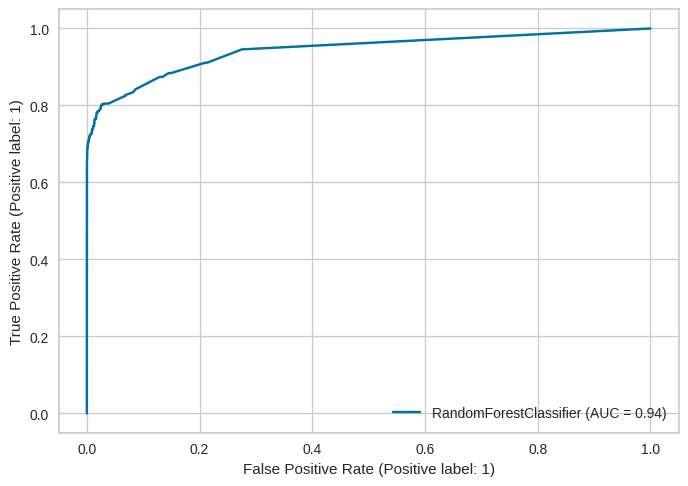

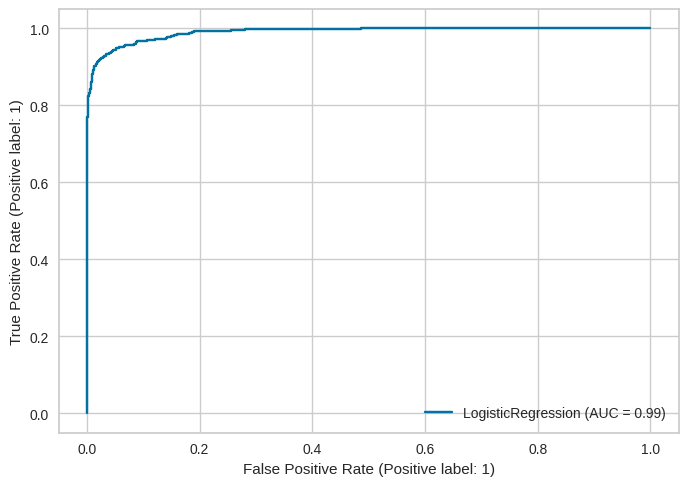

In [ ]:
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)
logit_disp = RocCurveDisplay.from_estimator(logit, X_test, y_test)

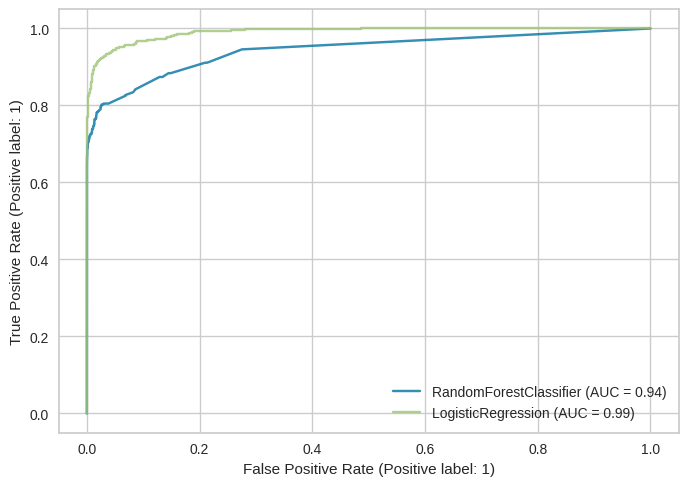

In [ ]:
ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
logit_disp.plot(ax=ax, alpha=0.8)


The micro-average and macro-average ROC-AUC scores provide additional insights into the overall performance of a multi-class classification model.

For Random Forest :
1. The micro-average score of 1.00 indicates perfect overall discrimination across all classes.
2. The macro-average score of 0.94 suggests strong discrimination on a per-class basis, with some variability in performance across classes.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


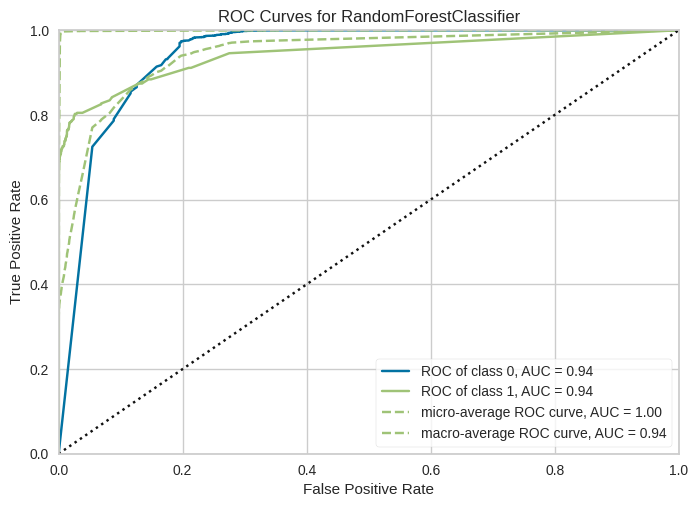

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(rf, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


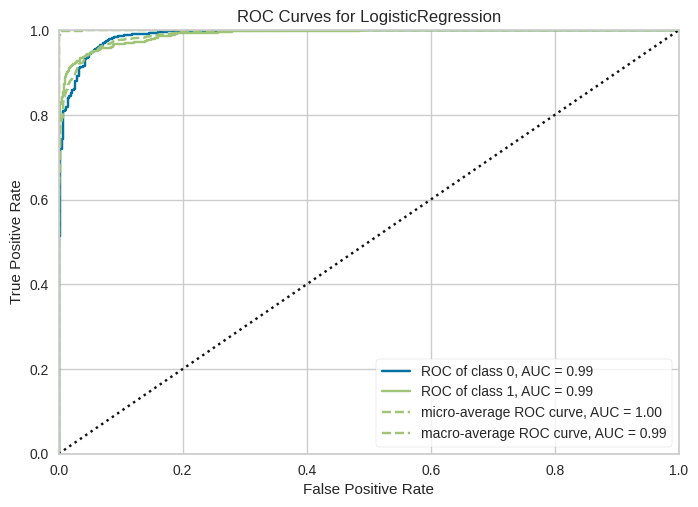

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(logit, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure